# 使用滑桿動態調整顏色過濾區間

### 1. 載入套件

In [2]:
# 載入套件
import numpy as np
import cv2 as cv


### 2. 讀取影像

In [3]:
# 讀取影像
img = cv.imread('./img/balls.jpg')
# img = cv.imread('./img/rgb.png')
# img = cv.imread('./img/polystyrene.jpg')
# img = cv.imread('./img/board.jpg')
# img = cv.imread('./img/workman.jpg')

# 轉換色彩空間 (RGB 彩色圖片由 OpenCV 讀取後，通道順序為 BGR)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)


### 3. 顏色上下界
<font color = red>OpenCV 的 HSV 中
- **H 像素值為 0\~180**
- **S 像素值為 0\~255**
- **V 像素值為 0\~255**
</font>

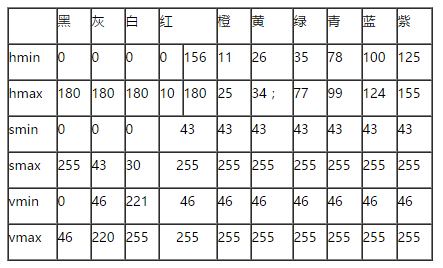

In [4]:
# 設定顏色區間上下界
hsv_lower = np.array([100, 43, 46])
hsv_upper = np.array([124, 255, 255])


### 5. 開啟視窗並使用滑桿調整影像 HSV 遮罩

In [5]:
# 呼叫 HSV 滑桿函式（該函式不展開介紹，有興趣請自行參閱
# %run base/base.ipynb
def hsv_track_bar(hsv_lower, hsv_upper, win_name):
    # 定義滑桿callback函式
    def on_trackbar_h_lower(value):
        hsv_lower[0] = min(value, hsv_upper[0])
    def on_trackbar_h_upper(value):
        hsv_upper[0] = max(value, hsv_lower[0])
    def on_trackbar_s_lower(value):
        hsv_lower[1] = min(value, hsv_upper[1])
    def on_trackbar_s_upper(value):
        hsv_upper[1] = max(value, hsv_lower[1])
    def on_trackbar_v_lower(value):
        hsv_lower[2] = min(value, hsv_upper[2])
    def on_trackbar_v_upper(value):
        hsv_upper[2] = max(value, hsv_lower[2])
        
    cv.namedWindow(win_name, cv.WINDOW_KEEPRATIO)
    cv.resizeWindow(win_name, 640, 480)
    
    # 創建HSV上下界滑桿
    cv.createTrackbar("H_lower\n", win_name, hsv_lower[0], 180, on_trackbar_h_lower)
    cv.createTrackbar("H_upper\n", win_name, hsv_upper[0], 180, on_trackbar_h_upper)
    cv.createTrackbar("S_lower\n", win_name, hsv_lower[1], 255, on_trackbar_s_lower)
    cv.createTrackbar("S_upper\n", win_name, hsv_upper[1], 255, on_trackbar_s_upper)
    cv.createTrackbar("V_lower\n", win_name, hsv_lower[2], 255, on_trackbar_v_lower)
    cv.createTrackbar("V_upper\n", win_name, hsv_upper[2], 255, on_trackbar_v_upper)
    
def hsv_track_bar_update(hsv_lower, hsv_upper, win_name):
    # 設定滑桿在視窗中的位置
    cv.setTrackbarPos("H_lower\n", win_name, hsv_lower[0])
    cv.setTrackbarPos("H_upper\n", win_name, hsv_upper[0])
    cv.setTrackbarPos("S_lower\n", win_name, hsv_lower[1])
    cv.setTrackbarPos("S_upper\n", win_name, hsv_upper[1])
    cv.setTrackbarPos("V_lower\n", win_name, hsv_lower[2])
    cv.setTrackbarPos("V_upper\n", win_name, hsv_upper[2])

win_name = 'HSV_Trackbar'  # 視窗名稱

# 建立滑桿
hsv_track_bar(hsv_lower, hsv_upper, win_name)

# 使用 while 迴圈不斷獲取滑桿數值並更新二值化影像
while True:
    # 同步滑桿數值（該函式不展開介紹，有興趣請自行參閱）
    hsv_track_bar_update(hsv_lower, hsv_upper, win_name)
    
    # 二值化為純黑純白影像，若介於自定義顏色區間內令像素值為255，反之則令像素值為0 (cv.inRange(輸入影像, 顏色區間下界, 顏色區間下上界))
    img_thres = cv.inRange(img_hsv, hsv_lower, hsv_upper)
    
    # 以二值化影像為遮罩，將原始影像進行邏輯閘and-gate運算 (cv.bitwise_and(輸入影像1, 輸入影像2, 遮罩影像))
    img_masked = cv.bitwise_and(img, img, mask=img_thres)
    
    # 顯示原始影像與HSV影像
    image = cv.hconcat([img, img_masked])
    
    # 顯示影像
    
    cv.imshow(win_name, image)

    # 按下任意鍵後結束
    if cv.waitKey(1) == 27:
        break

# 關閉所有視窗
cv.destroyAllWindows()
